Hasil Evaluasi Cross-Validation (Accuracy):
K-Nearest Neighbors: Rata-rata Akurasi = 0.9733 | Std Dev = 0.0327
Decision Tree: Rata-rata Akurasi = 0.9533 | Std Dev = 0.0427
Random Forest: Rata-rata Akurasi = 0.9533 | Std Dev = 0.0521
Support Vector Machine: Rata-rata Akurasi = 0.9600 | Std Dev = 0.0533


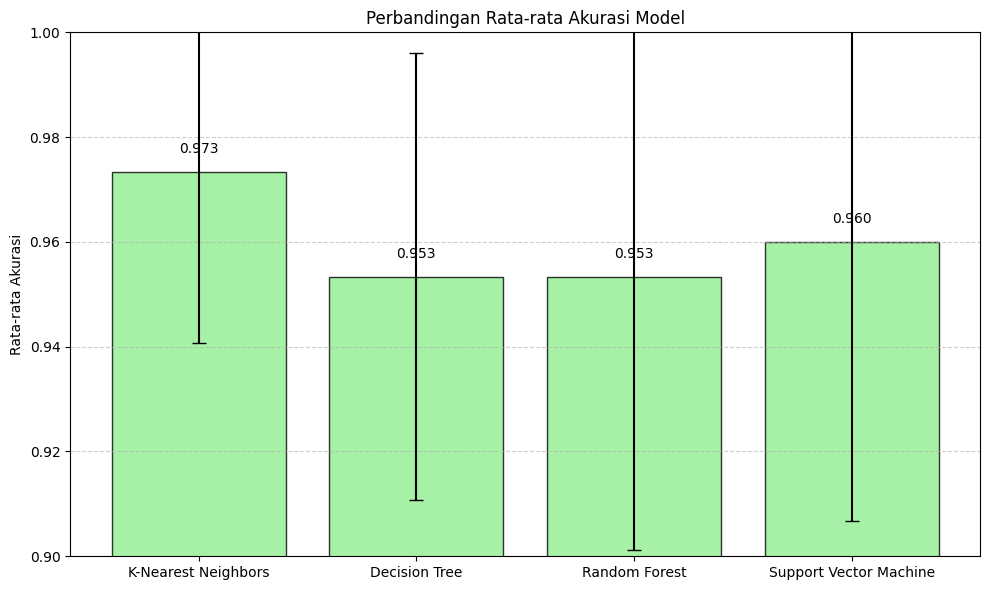

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("/content/Iris.csv")
df = df.drop(columns=["Id"])

#psh
X = df.drop(columns=["Species"])
y = LabelEncoder().fit_transform(df["Species"])

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

## c valid
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)

results = {}

print("Hasil Evaluasi Cross-Validation (Accuracy):")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv)
    mean_acc = scores.mean()
    std_acc = scores.std()
    results[name] = (mean_acc, std_acc)
    print(f"{name}: Rata-rata Akurasi = {mean_acc:.4f} | Std Dev = {std_acc:.4f}")

#grph
model_names = list(results.keys())
accuracies = [results[name][0] for name in model_names]
std_devs = [results[name][1] for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, yerr=std_devs, capsize=5, color='lightgreen', edgecolor='black', alpha=0.8)
plt.ylim(0.90, 1.00)
plt.title("Perbandingan Rata-rata Akurasi Model")
plt.ylabel("Rata-rata Akurasi")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.003, f"{acc:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
